# Microsoft Video Content Expansion

by: Lauren Coats
    Flatiron FT Data Science 
    

## Business Problem 

This notebook goes over an in-depth analyzation of top 150 movies, based on ROI from the past 10 years. Concluding in Professional recommendations for Microsoft that will aid them in making profitable business decisions regarding the creation of original video content.


## Business Value

This project is the next logical step for Microsoft to exand and diverifiy there holdings.  If done right this will impress shareholders and drive stock prices up. 

## Importing Data 

The data used for this project was scraped from www.imdb.com, a webside known for producing reviews and giving a few movie metrics as seen below. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import sqlite3 
import seaborn as sns


from glob import glob


In [2]:
cd~

C:\Users\laure


In [3]:

cd Flatiron\dsc-project-template\dsc-phase-1-project


C:\Users\laure\Flatiron\dsc-project-template\dsc-phase-1-project


In [4]:
pwd

'C:\\Users\\laure\\Flatiron\\dsc-project-template\\dsc-phase-1-project'

In [5]:
csv_files = glob("./zippedData/*.csv")
csv_files

['./zippedData\\bom.movie_gross.csv',
 './zippedData\\imdb.name.basics.csv',
 './zippedData\\imdb.title.akas.csv',
 './zippedData\\imdb.title.basics.csv',
 './zippedData\\imdb.title.crew.csv',
 './zippedData\\imdb.title.principals.csv',
 './zippedData\\imdb.title.ratings.csv',
 './zippedData\\tmdb.movies.csv',
 './zippedData\\tn.movie_budgets.csv']

In [6]:
csv_files[0]

'./zippedData\\bom.movie_gross.csv'

In [7]:
csv_read = {}

In [8]:
for file in csv_files:
    csv_read[file] = pd.read_csv(file)

In [9]:
type(csv_read)

dict

In [10]:
csv_read.keys()


dict_keys(['./zippedData\\bom.movie_gross.csv', './zippedData\\imdb.name.basics.csv', './zippedData\\imdb.title.akas.csv', './zippedData\\imdb.title.basics.csv', './zippedData\\imdb.title.crew.csv', './zippedData\\imdb.title.principals.csv', './zippedData\\imdb.title.ratings.csv', './zippedData\\tmdb.movies.csv', './zippedData\\tn.movie_budgets.csv'])

In [11]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace('.csv','').replace('.','_')
    filename_df = pd.read_csv(filename,index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [12]:
csv_files_dict.keys()

dict_keys(['bom_movie_gross', 'imdb_name_basics', 'imdb_title_akas', 'imdb_title_basics', 'imdb_title_crew', 'imdb_title_principals', 'imdb_title_ratings', 'tmdb_movies', 'tn_movie_budgets'])

## Cleaning Tables 

In order to get useable information from the data it must first be clean, by orginizing it in a way that can be graphed and charted. 

Below is a group of functions that was used repeated throughout the cleaning process. 

In [13]:
#Convert Object into Str
def convert_to_str(df, col):
    df[col] = df[col].astype('str')
    return df.info()

In [14]:
#Convert object to date YYYY-MM-DD
def convert_dates(df, col):
    df[col] = pd.to_datetime(df[col])
    return df.info()

In [15]:
#convert NaN and None and none to 0
def convert_0(df, col):
    df[col] = df[col].str.replace('NaN', 0).str.replace('None' , 0)\
        .str.replace('none' , 0).astype('int64')
    df=df[col].str.fillna(0, inplace = True).astype('int64')
    return df.sort_values(col)


In [16]:
def convert_to_int(df, col):
    df[col] = df[col].str.replace('$', '').str.replace(',', '').astype('int64')
    return df.info()

In [17]:
def remove_rows(df, col, index):
    df = df.loc[df[col] != index]
#     inplace=True
    df.info()
    return df

In [18]:
def sort_values(df, col):
    df.sort_values(col)

### bom_movie_gross

    - Need to change types to reflect what the data type is so that it can be compared with other numbers. Also the NaN with in foreign gross needs to be converted to 0 
    

In [19]:
bom_movie_gross_df = csv_files_dict['bom_movie_gross']
bom_movie_gross_df.info()
bom_movie_gross_df.sort_values('foreign_gross')

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


,studio,domestic_gross,foreign_gross,year
title,,,,
The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017
Jurassic World,Uni.,652300000.0,"1,019.4",2015
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
Furious 7,Uni.,353000000.0,"1,163.0",2015
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [20]:
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].fillna(0)

## imdb_title_akas
	-Set original to 1 and get rid of the rest
    (use to get the name of movie in another cell )


In [21]:
#Creating df for imdb_title_akas
imdb_title_akas_df = csv_files_dict['imdb_title_akas']
imdb_title_akas_df.info()
imdb_title_akas_df['is_original_title'] = imdb_title_akas_df['is_original_title'].fillna(0)
imdb_title_akas_df.sort_values('ordering')

<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ordering           331703 non-null  int64  
 1   title              331703 non-null  object 
 2   region             278410 non-null  object 
 3   language           41715 non-null   object 
 4   types              168447 non-null  object 
 5   attributes         14925 non-null   object 
 6   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.2+ MB


,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt1529241,1,Buenavista (Ang kasaysayan ng Lucena),PH,NaN,NaN,NaN,0.0
tt3497340,1,Tenacity and Gratitude: The Frank Cotolo Story,NaN,NaN,original,NaN,1.0
tt3498716,1,The Art Lives,US,NaN,NaN,NaN,0.0
tt3499896,1,The Philosopher and the Faithful,FR,NaN,NaN,NaN,0.0
tt3500702,1,Excision,GR,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
tt2488496,57,Star Wars: Das Erwachen der Macht,DE,NaN,alternative,NaN,0.0
tt2488496,58,Star Wars: O Despertar da Força,BR,NaN,imdbDisplay,NaN,0.0
tt2488496,59,Star Wars: Episódio VII - O Despertar da Força,PT,NaN,imdbDisplay,NaN,0.0


In [22]:
def remove_rows(df, col, index):
    df = df.loc[df[col] != index]
#     inplace=True
    df.info()
    return df
    
# tn_movie_budgets_df = remove_rows(tn_movie_budgets_df, 'worldwide_gross'  , 0)
# tn_movie_budgets_df.sort_values('worldwide_gross')
imdb_title_akas_df = remove_rows(imdb_title_akas_df, 'is_original_title'  , 0.0)
imdb_title_akas_df.sort_values('is_original_title')

<class 'pandas.core.frame.DataFrame'>
Index: 44700 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ordering           44700 non-null  int64  
 1   title              44700 non-null  object 
 2   region             6 non-null      object 
 3   language           4 non-null      object 
 4   types              44700 non-null  object 
 5   attributes         0 non-null      object 
 6   is_original_title  44700 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.7+ MB


,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt0369610,45,Jurassic World,NaN,NaN,original,NaN,1.0
tt5474656,1,Deti 90-kh,NaN,NaN,original,NaN,1.0
tt5476912,4,Massakren i Dvor,NaN,NaN,original,NaN,1.0
tt5478700,2,Dagenham,NaN,NaN,original,NaN,1.0
tt5487052,3,Den vyborov 2,NaN,NaN,original,NaN,1.0
...,...,...,...,...,...,...,...
tt2265640,1,All Roads Lead,NaN,NaN,original,NaN,1.0
tt2274604,4,Eat with Me,NaN,NaN,original,NaN,1.0
tt2275667,1,Ein Versprechen,NaN,NaN,original,NaN,1.0


## imdb_title_basics
	-remove years before 2010 
	-separate genres by comma


In [23]:
#Creating df for imdb_title_basics
imdb_title_basics_df = csv_files_dict['imdb_title_basics']
imdb_title_basics_df.info()
imdb_title_basics_df.sort_values('start_year')


<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt1566491,Brainiacs in La La Land,Brainiacs in La La Land,2010,NaN,Comedy
tt2578092,Fireplace for your Home: Crackling Fireplace w...,Fireplace for your Home: Crackling Fireplace w...,2010,61.0,Music
tt1634300,Role/Play,Role/Play,2010,85.0,"Drama,Romance"
tt1634332,Johan1,Johan Primero,2010,78.0,"Comedy,Drama,Romance"
tt1634334,Hands Up,Les mains en l'air,2010,90.0,Drama
...,...,...,...,...,...
tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,NaN
tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy


In [24]:
imdb_title_basics_df['movie']=imdb_title_basics_df['original_title']

In [25]:
def remove_rows_greater_than(df, col, index):
    df = df.loc[df[col] <= index]
#     inplace=True
    df.info()
    return df

imdb_title_basics_df = remove_rows_greater_than(imdb_title_basics_df, 'start_year', 2020)
imdb_title_basics_df.sort_values('start_year')

<class 'pandas.core.frame.DataFrame'>
Index: 146018 entries, tt0063540 to tt9916754
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146018 non-null  object 
 1   original_title   145997 non-null  object 
 2   start_year       146018 non-null  int64  
 3   runtime_minutes  114398 non-null  float64
 4   genres           140622 non-null  object 
 5   movie            145997 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


,primary_title,original_title,start_year,runtime_minutes,genres,movie
tconst,,,,,,
tt1579444,The Song Beneath the Song,To tragoudi kato apo to tragoudi,2010,89.0,Romance,To tragoudi kato apo to tragoudi
tt1543511,Mister Rogers & Me,Mister Rogers & Me,2010,79.0,Documentary,Mister Rogers & Me
tt1543566,New Year,New Year,2010,77.0,"Comedy,Drama,Romance",New Year
tt1543597,Off World,Off World,2010,76.0,Drama,Off World
tt1543609,The Sark Case,The Sark Case,2010,75.0,Documentary,The Sark Case
...,...,...,...,...,...,...
tt10328454,Untitled Danny Ramirez Horror,Untitled Danny Ramirez Horror,2020,NaN,Horror,Untitled Danny Ramirez Horror
tt6723592,Tenet,Tenet,2020,NaN,"Action,Drama,Thriller",Tenet
tt10426048,Romeo + Juliet,Romeo + Juliet,2020,NaN,"Drama,Romance,Thriller",Romeo + Juliet


## imdb_title_basics
	-remove years before 2010 
	-separate genres by comma


In [26]:
#Creating df for imdb_title_principals
imdb_title_principals_df = csv_files_dict['imdb_title_principals']
imdb_title_principals_df.info()
imdb_title_principals_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ordering    1028186 non-null  int64 
 1   nconst      1028186 non-null  object
 2   category    1028186 non-null  object
 3   job         177684 non-null   object
 4   characters  393360 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.1+ MB


,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN
tt0323808,10,nm0059247,editor,NaN,NaN
tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


## imdb_title_ratings
	-get name from other table 


In [27]:
#Creating df for imdb_title_ratings
imdb_title_ratings_df = csv_files_dict['imdb_title_ratings']
imdb_title_ratings_df.info()
imdb_title_ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


## tmdb_movies
	-Table is fine 


In [28]:
#Creating df for bom_movie_gross
tmdb_movies_df = csv_files_dict['tmdb_movies']
tmdb_movies_df.info()
tmdb_movies_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## tn_movie_budgets
	-Remove all ($0 domestic gross AND $0 world wide)
	-Remove Movies before 2010
	-Change date to XXXX-MM-DD format
	-Create a domestic and world wide profit line 
	-Change money in to floats (will need to remove $)


In [29]:
#Creating df for tn_movie_budgets
tn_movie_budgets_df = csv_files_dict['tn_movie_budgets']
tn_movie_budgets_df.info()
tn_movie_budgets_df.sort_values('domestic_gross')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
82,"Oct 26, 2012",Mientras duermes,"$5,000,000",$0,"$9,109,597"
9,"Nov 4, 2005",Wal-Mart: The High Cost of Low Price,"$1,500,000",$0,"$58,692"
8,"Jul 20, 2018",Teefa in Trouble,"$1,500,000",$0,"$98,806"
7,"Oct 17, 2014",Housebound,"$1,500,000",$0,"$236,863"
58,"Dec 31, 2008",Bathory,"$15,000,000",$0,"$3,436,763"
...,...,...,...,...,...
8,"Jun 13, 1997",Hercules,"$70,000,000","$99,112,101","$250,700,000"
74,"Jun 4, 1999",Desert Blue,"$5,000,000","$99,147","$99,147"
43,"Aug 3, 2018",Christopher Robin,"$75,000,000","$99,215,042","$197,504,758"


In [30]:
convert_to_int(tn_movie_budgets_df, 'production_budget')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(4)
memory usage: 271.0+ KB


In [31]:
convert_to_int(tn_movie_budgets_df, 'domestic_gross')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   object
dtypes: int64(2), object(3)
memory usage: 271.0+ KB


In [32]:
convert_to_int(tn_movie_budgets_df, 'worldwide_gross')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [33]:
def remove_rows_less_than(df, col, index):
    df = df.loc[df[col] >= index]
#     inplace=True
    df.info()
    return df

In [34]:
convert_to_str(tn_movie_budgets_df, 'movie')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [35]:
convert_dates(tn_movie_budgets_df, 'release_date')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 271.0+ KB


In [36]:
tn_movie_budgets_df = remove_rows_greater_than(tn_movie_budgets_df, 'release_date', '2020-12-01')
tn_movie_budgets_df.sort_values('release_date')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5780 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5780 non-null   datetime64[ns]
 1   movie              5780 non-null   object        
 2   production_budget  5780 non-null   int64         
 3   domestic_gross     5780 non-null   int64         
 4   worldwide_gross    5780 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 270.9+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
78,1915-02-08,The Birth of a Nation,110000,10000000,11000000
24,1916-09-05,Intolerance,385907,0,0
15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
7,1925-11-19,The Big Parade,245000,11000000,22000000
...,...,...,...,...,...
13,2019-12-31,Rogue City,13000000,0,0
16,2019-12-31,Eli,11000000,0,0
30,2019-12-31,Reagan,25000000,0,0


In [37]:
tn_movie_budgets_df = remove_rows_less_than(tn_movie_budgets_df, 'release_date', '2010-01-01')
tn_movie_budgets_df.sort_values('production_budget')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2192 entries, 2 to 81
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       2192 non-null   datetime64[ns]
 1   movie              2192 non-null   object        
 2   production_budget  2192 non-null   int64         
 3   domestic_gross     2192 non-null   int64         
 4   worldwide_gross    2192 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 102.8+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
81,2015-09-29,A Plague So Pleasant,1400,0,0
78,2018-12-31,Red 11,7000,0,0
73,2012-01-13,Newlyweds,9000,4584,4584
72,2015-05-19,Family Motocross,10000,0,0
61,2010-04-02,Breaking Upwards,15000,115592,115592
...,...,...,...,...,...
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963


In [38]:
def remove_rows(df, col, index):
    df = df.loc[df[col] != index]
#     inplace=True
    df.info()
    return df
    
tn_movie_budgets_df = remove_rows(tn_movie_budgets_df, 'worldwide_gross'  , 0)
tn_movie_budgets_df.sort_values('worldwide_gross')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 2 to 73
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1922 non-null   datetime64[ns]
 1   movie              1922 non-null   object        
 2   production_budget  1922 non-null   int64         
 3   domestic_gross     1922 non-null   int64         
 4   worldwide_gross    1922 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 90.1+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
3,2015-12-11,American Hero,1000000,0,26
36,2014-11-21,Food Chains,913000,0,176
84,2014-12-31,Destiny,750000,0,450
67,2018-05-11,Higher Power,500000,528,528
82,2010-05-21,Perrierâs Bounty,6600000,828,828
...,...,...,...,...,...
27,2012-05-04,The Avengers,225000000,623279547,1517935897
67,2015-04-03,Furious 7,190000000,353007020,1518722794
34,2015-06-12,Jurassic World,215000000,652270625,1648854864


In [39]:
def remove_rows_between(df, col, index, index2):
    df = df.loc[df[col] >= index] 
    df = df.loc[df[col] <= index2]
#     inplace=True
    df.info()
    return df

tn_movie_budgets_df = remove_rows_between(tn_movie_budgets_df, 'release_date'  , '2010-01-01' , '2021-01-01')
tn_movie_budgets_df.sort_values('release_date')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 2 to 73
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1922 non-null   datetime64[ns]
 1   movie              1922 non-null   object        
 2   production_budget  1922 non-null   int64         
 3   domestic_gross     1922 non-null   int64         
 4   worldwide_gross    1922 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 90.1+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
13,2010-01-08,Youth in Revolt,18000000,15285588,19685588
40,2010-01-08,Leap Year,19000000,25918920,32618920
67,2010-01-08,Daybreakers,20000000,30101577,51445503
36,2010-01-15,Fish Tank,3000000,374675,5922292
25,2010-01-15,The Last Station,18000000,6617867,15696146
...,...,...,...,...,...
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
81,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496
98,2019-06-14,Shaft,30000000,600000,600000


In [40]:
tn_movie_budgets_df['domestic_gross_profit'] = (0 - tn_movie_budgets_df['production_budget']) + tn_movie_budgets_df['domestic_gross']
tn_movie_budgets_df.sort_values('release_date')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit
id,,,,,,
13,2010-01-08,Youth in Revolt,18000000,15285588,19685588,-2714412
40,2010-01-08,Leap Year,19000000,25918920,32618920,6918920
67,2010-01-08,Daybreakers,20000000,30101577,51445503,10101577
36,2010-01-15,Fish Tank,3000000,374675,5922292,-2625325
25,2010-01-15,The Last Station,18000000,6617867,15696146,-11382133
...,...,...,...,...,...,...
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650
81,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496,-16204345
98,2019-06-14,Shaft,30000000,600000,600000,-29400000


In [41]:
tn_movie_budgets_df['worldwide_gross_profit'] = (0 - tn_movie_budgets_df['production_budget']) + tn_movie_budgets_df['worldwide_gross']
tn_movie_budgets_df.sort_values('release_date')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit
id,,,,,,,
13,2010-01-08,Youth in Revolt,18000000,15285588,19685588,-2714412,1685588
40,2010-01-08,Leap Year,19000000,25918920,32618920,6918920,13618920
67,2010-01-08,Daybreakers,20000000,30101577,51445503,10101577,31445503
36,2010-01-15,Fish Tank,3000000,374675,5922292,-2625325,2922292
25,2010-01-15,The Last Station,18000000,6617867,15696146,-11382133,-2303854
...,...,...,...,...,...,...,...
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650
81,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496,-16204345,33351496
98,2019-06-14,Shaft,30000000,600000,600000,-29400000,-29400000


In [42]:
tn_movie_budgets_df['domestic_roi_percent'] = round(tn_movie_budgets_df['domestic_gross'] /\
                                                    tn_movie_budgets_df['production_budget'], 0)
tn_movie_budgets_df.sort_values('domestic_roi_percent')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent
id,,,,,,,,
39,2017-09-29,"Don Gato, el inicio de la pandilla",8000000,0,4604656,-8000000,-3395344,0.0
32,2016-07-13,The Infiltrator,47500000,15436808,20718104,-32063192,-26781896,0.0
12,2016-05-06,Dheepan,9000000,248795,7704357,-8751205,-1295643,0.0
40,2010-06-18,Jonah Hex,47000000,10547117,11022696,-36452883,-35977304,0.0
42,2016-12-23,Silence,46500000,7100177,23726626,-39399823,-22773374,0.0
...,...,...,...,...,...,...,...,...
49,2017-02-24,Get Out,5000000,176040665,255367951,171040665,250367951,35.0
63,2011-04-01,Insidious,1500000,54009150,99870886,52509150,98370886,36.0
90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,59605732,62627092,53.0


In [43]:
#Remove max from tn_movie_budgets_df
tn_movie_budgets_df = tn_movie_budgets_df.loc[tn_movie_budgets_df['domestic_roi_percent']!=tn_movie_budgets_df\
                                              ['domestic_roi_percent'].max()]
tn_movie_budgets_df.info()
tn_movie_budgets_df.sort_values('domestic_roi_percent')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921 entries, 2 to 73
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   release_date            1921 non-null   datetime64[ns]
 1   movie                   1921 non-null   object        
 2   production_budget       1921 non-null   int64         
 3   domestic_gross          1921 non-null   int64         
 4   worldwide_gross         1921 non-null   int64         
 5   domestic_gross_profit   1921 non-null   int64         
 6   worldwide_gross_profit  1921 non-null   int64         
 7   domestic_roi_percent    1921 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 135.1+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent
id,,,,,,,,
39,2017-09-29,"Don Gato, el inicio de la pandilla",8000000,0,4604656,-8000000,-3395344,0.0
32,2016-07-13,The Infiltrator,47500000,15436808,20718104,-32063192,-26781896,0.0
12,2016-05-06,Dheepan,9000000,248795,7704357,-8751205,-1295643,0.0
40,2010-06-18,Jonah Hex,47000000,10547117,11022696,-36452883,-35977304,0.0
42,2016-12-23,Silence,46500000,7100177,23726626,-39399823,-22773374,0.0
...,...,...,...,...,...,...,...,...
14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,63364198,33.0
49,2017-02-24,Get Out,5000000,176040665,255367951,171040665,250367951,35.0
63,2011-04-01,Insidious,1500000,54009150,99870886,52509150,98370886,36.0


In [44]:
#Remove max from tn_movie_budgets_df
tn_movie_budgets_df = tn_movie_budgets_df.loc[tn_movie_budgets_df['domestic_gross_profit']!=tn_movie_budgets_df\
                                              ['domestic_gross_profit'].max()]
tn_movie_budgets_df.info()
tn_movie_budgets_df.sort_values('domestic_gross_profit')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 2 to 73
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   release_date            1920 non-null   datetime64[ns]
 1   movie                   1920 non-null   object        
 2   production_budget       1920 non-null   int64         
 3   domestic_gross          1920 non-null   int64         
 4   worldwide_gross         1920 non-null   int64         
 5   domestic_gross_profit   1920 non-null   int64         
 6   worldwide_gross_profit  1920 non-null   int64         
 7   domestic_roi_percent    1920 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 135.0+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent
id,,,,,,,,
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,0.0
14,2012-03-09,John Carter,275000000,73058679,282778100,-201941321,7778100,0.0
13,2013-07-02,The Lone Ranger,275000000,89302115,260002115,-185697885,-14997885,0.0
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,1.0
32,2012-05-18,Battleship,220000000,65233400,313477717,-154766600,93477717,0.0
...,...,...,...,...,...,...,...,...
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,2.0
27,2012-05-04,The Avengers,225000000,623279547,1517935897,398279547,1292935897,3.0
44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,408581744,1042520711,3.0


In [45]:
tn_movie_budgets_df['worldwide_roi_percent'] = round(tn_movie_budgets_df['worldwide_gross'] / \
                                                tn_movie_budgets_df['production_budget'],0)
tn_movie_budgets_df.sort_values('worldwide_roi_percent')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent
id,,,,,,,,,
21,2015-01-20,Veronika Decides to Die,9000000,0,2243,-9000000,-8997757,0.0,0.0
49,2010-04-30,Gunless,9900000,458054,458054,-9441946,-9441946,0.0,0.0
5,2015-10-02,Shanghai,50000000,46425,15505922,-49953575,-34494078,0.0,0.0
2,2015-04-17,Child 44,50000000,1224330,8004221,-48775670,-41995779,0.0,0.0
81,2016-06-24,Free State of Jones,50000000,20810036,23237252,-29189964,-26762748,0.0,0.0
...,...,...,...,...,...,...,...,...,...
50,2017-01-20,Split,5000000,138141585,278964806,133141585,273964806,28.0,56.0
65,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,81752907,174512032,28.0,59.0
14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,63364198,33.0,64.0


## TOP 150 Moives 
    
    We will be evaulating the top 100 movies bases on Domestic ROI

In [46]:
def IQR(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]  
    
    return df

## Determining the Budget


Using the top 150 movies to come up with metrics for the movie such as Domestic Gross,
Domestic Profit, Worldwide Gross, Worldwide profit, Domestic ROI, and Worldwide ROI. Once the
mean of those numbers are found I can use them to determine the budget along with the metrics
that would qualify this project as successful.

In [47]:
top150_gd = tn_movie_budgets_df.sort_values('domestic_gross').tail(150)
top150_gd = IQR(top150_gd, 'domestic_gross')

In [48]:
top150_wg = tn_movie_budgets_df.sort_values('worldwide_gross').tail(150)
top150_wg = IQR(top150_wg, 'worldwide_gross')

In [49]:
top150_dgp = tn_movie_budgets_df.sort_values('domestic_gross_profit').tail(150)
top150_dgp = IQR(top150_dgp, 'domestic_gross_profit')

In [50]:
top150_wgp = tn_movie_budgets_df.sort_values('worldwide_gross_profit').tail(150)
top150_wgp = IQR(top150_wgp, 'worldwide_gross_profit')

In [51]:
top150_drp = tn_movie_budgets_df.sort_values('domestic_roi_percent').tail(150)
top150_drp = IQR(top150_drp, 'domestic_roi_percent')

In [52]:
top150_wrp = tn_movie_budgets_df.sort_values('worldwide_roi_percent').tail(150)
top150_wrp = IQR(top150_wrp, 'worldwide_roi_percent')

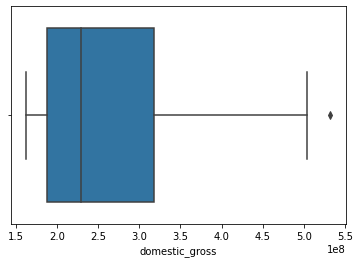

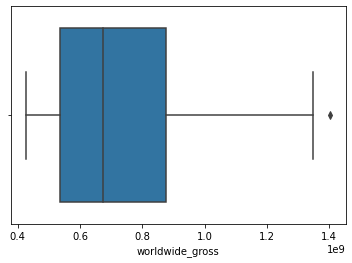

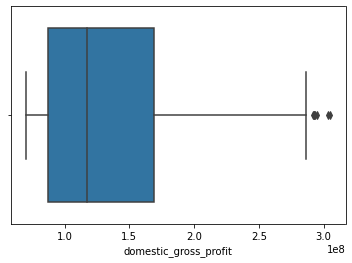

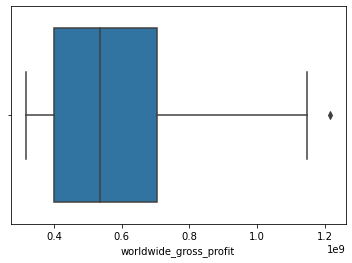

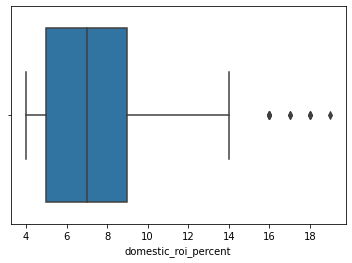

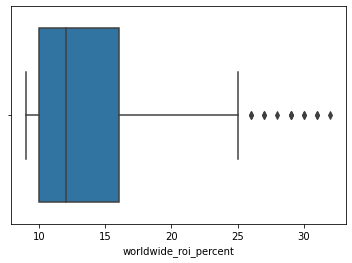

In [53]:
sns.boxplot(x=top150_gd['domestic_gross'])
plt.show()
sns.boxplot(x=top150_wg['worldwide_gross'])
plt.show()
sns.boxplot(x=top150_dgp['domestic_gross_profit'])
plt.show()
sns.boxplot(x=top150_wgp['worldwide_gross_profit'])
plt.show()
sns.boxplot(x=top150_drp['domestic_roi_percent'])
plt.show()
sns.boxplot(x=top150_wrp['worldwide_roi_percent'])
plt.show()

In [54]:
print('top150_gd[domestic_gross]')
print(round(top150_gd['domestic_gross'].mean(),2))
print('top150_wg[worldwide_gross]')
print(round(top150_wg['worldwide_gross'].mean(),2))
print('top150_dgp[domestic_gross_profit]')
print(round(top150_dgp['domestic_gross_profit'].mean(),2))
print('top150_wgp[worldwide_gross_profit]')
print(round(top150_wgp['worldwide_gross_profit'].mean(),2))
print('top150_drp[domestic_roi_percent]')
print(round(top150_drp['domestic_roi_percent'].mean(),2))
print('top150_wrp[worldwide_roi_percent]')
print(round(top150_wrp['worldwide_roi_percent'].mean(),2))


top150_gd[domestic_gross]
257607969.4
top150_wg[worldwide_gross]
737928247.17
top150_dgp[domestic_gross_profit]
137324039.1
top150_wgp[worldwide_gross_profit]
587494350.54
top150_drp[domestic_roi_percent]
8.0
top150_wrp[worldwide_roi_percent]
14.42


Based on the above means the Budget was determine by subtracting the Domestic Gross Profit
from the Domestic Gross.


In [55]:
round(top150_gd['domestic_gross'].mean(),2)\
 - round(top150_dgp['domestic_gross_profit'].mean(),2)


120283930.30000001

## Genere

In [56]:
top_150 = tn_movie_budgets_df.sort_values('domestic_roi_percent').tail(150)
top_150['year'] = pd.DatetimeIndex(top_150['release_date']).year

In [57]:
movie_details_df = pd.merge(top_150, imdb_title_basics_df, left_on = ['movie'], right_on= ['primary_title'], how = 'left')

In [58]:
movie_details_df.dropna(inplace=True)

In [59]:
movie_details_df2 = pd.merge(top_150, imdb_title_basics_df, left_on= ['movie', 'year'], 
                right_on = ['primary_title', 'start_year'], how = 'left')

In [60]:
movie_details_df2.shape

(152, 16)

In [61]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   release_date            152 non-null    datetime64[ns]
 1   movie_x                 152 non-null    object        
 2   production_budget       152 non-null    int64         
 3   domestic_gross          152 non-null    int64         
 4   worldwide_gross         152 non-null    int64         
 5   domestic_gross_profit   152 non-null    int64         
 6   worldwide_gross_profit  152 non-null    int64         
 7   domestic_roi_percent    152 non-null    float64       
 8   worldwide_roi_percent   152 non-null    float64       
 9   year                    152 non-null    int64         
 10  primary_title           117 non-null    object        
 11  original_title          117 non-null    object        
 12  start_year              117 non-null    float64   

In [62]:
movie_details_df2.dropna(inplace=True)
movie_details_df2

,release_date,movie_x,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent,year,primary_title,original_title,start_year,runtime_minutes,genres,movie_y
0,2016-01-22,The Boy,10000000,35819556,68220952,25819556,58220952,4.0,7.0,2016,The Boy,The Boy,2016.0,97.0,"Horror,Mystery,Thriller",The Boy
1,2017-10-27,Jigsaw,10000000,38052832,102445196,28052832,92445196,4.0,10.0,2017,Jigsaw,Jigsaw,2017.0,92.0,"Crime,Horror,Mystery",Jigsaw
2,2018-03-16,"Love, Simon",10000000,40826341,65520633,30826341,55520633,4.0,7.0,2018,"Love, Simon","Love, Simon",2018.0,110.0,"Comedy,Drama,Romance","Love, Simon"
3,2014-02-14,About Last Night,13000000,48637684,50445860,35637684,37445860,4.0,4.0,2014,About Last Night,About Last Night,2014.0,100.0,"Comedy,Romance",About Last Night
4,2014-08-22,If I Stay,11000000,50474843,78356170,39474843,67356170,5.0,7.0,2014,If I Stay,If I Stay,2014.0,107.0,"Drama,Fantasy,Music",If I Stay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2010-08-27,The Last Exorcism,1800000,41034350,70165900,39234350,68365900,23.0,39.0,2010,The Last Exorcism,The Last Exorcism,2010.0,87.0,"Drama,Horror,Thriller",The Last Exorcism
144,2015-08-28,War Room,3000000,67790117,73975239,64790117,70975239,23.0,25.0,2015,War Room,War Room,2015.0,120.0,Drama,War Room
145,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,81752907,174512032,28.0,59.0,2010,Paranormal Activity 2,Paranormal Activity 2,2010.0,91.0,Horror,Paranormal Activity 2
148,2017-02-24,Get Out,5000000,176040665,255367951,171040665,250367951,35.0,51.0,2017,Get Out,Get Out,2017.0,104.0,"Horror,Mystery,Thriller",Get Out


In [63]:
movie_details_df['genres'] = movie_details_df['genres'].apply(lambda x: x.split(',') if x else x)
movie_details_df.head()

,release_date,movie_x,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent,year,primary_title,original_title,start_year,runtime_minutes,genres,movie_y
0,2016-01-22,The Boy,10000000,35819556,68220952,25819556,58220952,4.0,7.0,2016,The Boy,The Boy,2015.0,105.0,"[Drama, Horror, Thriller]",The Boy
1,2016-01-22,The Boy,10000000,35819556,68220952,25819556,58220952,4.0,7.0,2016,The Boy,The Boy,2016.0,97.0,"[Horror, Mystery, Thriller]",The Boy
2,2017-10-27,Jigsaw,10000000,38052832,102445196,28052832,92445196,4.0,10.0,2017,Jigsaw,Jigsaw,2017.0,92.0,"[Crime, Horror, Mystery]",Jigsaw
3,2018-03-16,"Love, Simon",10000000,40826341,65520633,30826341,55520633,4.0,7.0,2018,"Love, Simon","Love, Simon",2018.0,110.0,"[Comedy, Drama, Romance]","Love, Simon"
4,2014-02-14,About Last Night,13000000,48637684,50445860,35637684,37445860,4.0,4.0,2014,About Last Night,About Last Night,2014.0,100.0,"[Comedy, Romance]",About Last Night


In [64]:
movie_details_df2['genres'] = movie_details_df2['genres'].apply(lambda x: x.split(',') if x else x)
movie_details_df.head()

,release_date,movie_x,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent,year,primary_title,original_title,start_year,runtime_minutes,genres,movie_y
0,2016-01-22,The Boy,10000000,35819556,68220952,25819556,58220952,4.0,7.0,2016,The Boy,The Boy,2015.0,105.0,"[Drama, Horror, Thriller]",The Boy
1,2016-01-22,The Boy,10000000,35819556,68220952,25819556,58220952,4.0,7.0,2016,The Boy,The Boy,2016.0,97.0,"[Horror, Mystery, Thriller]",The Boy
2,2017-10-27,Jigsaw,10000000,38052832,102445196,28052832,92445196,4.0,10.0,2017,Jigsaw,Jigsaw,2017.0,92.0,"[Crime, Horror, Mystery]",Jigsaw
3,2018-03-16,"Love, Simon",10000000,40826341,65520633,30826341,55520633,4.0,7.0,2018,"Love, Simon","Love, Simon",2018.0,110.0,"[Comedy, Drama, Romance]","Love, Simon"
4,2014-02-14,About Last Night,13000000,48637684,50445860,35637684,37445860,4.0,4.0,2014,About Last Night,About Last Night,2014.0,100.0,"[Comedy, Romance]",About Last Night


In [65]:
movie_details_df2['genres'] = movie_details_df2['genres'].astype(str)
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 150
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   release_date            117 non-null    datetime64[ns]
 1   movie_x                 117 non-null    object        
 2   production_budget       117 non-null    int64         
 3   domestic_gross          117 non-null    int64         
 4   worldwide_gross         117 non-null    int64         
 5   domestic_gross_profit   117 non-null    int64         
 6   worldwide_gross_profit  117 non-null    int64         
 7   domestic_roi_percent    117 non-null    float64       
 8   worldwide_roi_percent   117 non-null    float64       
 9   year                    117 non-null    int64         
 10  primary_title           117 non-null    object        
 11  original_title          117 non-null    object        
 12  start_year              117 non-null    float64   

In [66]:
#movie_details_df['genres'] = movie_details_df['genres'].astype(str)

In [67]:
all_genres = set()
for genres in movie_details_df['genres']:
    if genres:
        all_genres.update(genres)

In [68]:
all_genres


{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'Western'}

In [69]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 150
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   release_date            117 non-null    datetime64[ns]
 1   movie_x                 117 non-null    object        
 2   production_budget       117 non-null    int64         
 3   domestic_gross          117 non-null    int64         
 4   worldwide_gross         117 non-null    int64         
 5   domestic_gross_profit   117 non-null    int64         
 6   worldwide_gross_profit  117 non-null    int64         
 7   domestic_roi_percent    117 non-null    float64       
 8   worldwide_roi_percent   117 non-null    float64       
 9   year                    117 non-null    int64         
 10  primary_title           117 non-null    object        
 11  original_title          117 non-null    object        
 12  start_year              117 non-null    float64   

In [70]:
for genre in all_genres:
    movie_details_df2[genre] = np.zeros(shape=movie_details_df2.shape[0])
    
movie_details_df2.head()

,release_date,movie_x,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent,year,...,Music,History,Sci-Fi,Adventure,Thriller,Western,Romance,Action,Animation,Comedy
0,2016-01-22,The Boy,10000000,35819556,68220952,25819556,58220952,4.0,7.0,2016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-10-27,Jigsaw,10000000,38052832,102445196,28052832,92445196,4.0,10.0,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-03-16,"Love, Simon",10000000,40826341,65520633,30826341,55520633,4.0,7.0,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-02-14,About Last Night,13000000,48637684,50445860,35637684,37445860,4.0,4.0,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-08-22,If I Stay,11000000,50474843,78356170,39474843,67356170,5.0,7.0,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
for index, row in movie_details_df2.iterrows():
    if row['genres']:
        for genre in row['genres']:
            movie_details_df2.loc[index,genre] = 1
            
movie_details_df2.head()

,release_date,movie_x,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent,year,...,F,u,A,v,S,-,B,g,p,W
0,2016-01-22,The Boy,10000000,35819556,68220952,25819556,58220952,4.0,7.0,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-10-27,Jigsaw,10000000,38052832,102445196,28052832,92445196,4.0,10.0,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-16,"Love, Simon",10000000,40826341,65520633,30826341,55520633,4.0,7.0,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-02-14,About Last Night,13000000,48637684,50445860,35637684,37445860,4.0,4.0,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-08-22,If I Stay,11000000,50474843,78356170,39474843,67356170,5.0,7.0,2014,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
movie_details_df_modified = movie_details_df.drop(columns = 'genres')

In [73]:
for col in movie_details_df_modified:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{movie_details_df_modified[col].value_counts()}')

Viewing values in col: release_date
Top 5 values:
2015-08-07    9
2018-04-13    6
2013-01-18    6
2017-01-20    5
2015-09-11    4
             ..
2018-10-05    1
2018-07-04    1
2010-10-15    1
2016-12-09    1
2018-05-11    1
Name: release_date, Length: 130, dtype: int64
Viewing values in col: movie_x
Top 5 values:
The Gift                          9
Truth or Dare                     6
Mama                              6
Split                             5
Neighbors                         4
                                 ..
The Best Exotic Marigold Hotel    1
Sausage Party                     1
The Conjuring                     1
Safety Not Guaranteed             1
Justin Bieber: Never Say Never    1
Name: movie_x, Length: 134, dtype: int64
Viewing values in col: production_budget
Top 5 values:
5000000     36
20000000    12
10000000    11
1000000     11
3500000     10
15000000     8
12000000     6
2000000      5
13000000     5
1500000      4
3000000      4
7000000      4
18000000   

In [74]:
cols = list(movie_details_df2.columns)

In [75]:
genre_cols = cols[11:]

In [76]:
genre_count = {}
for col in genre_cols:
    count = np.sum(movie_details_df2[col] == 1).sum()
    genre_count[col] = count

In [77]:
genre_count

{'original_title': 0,
 'start_year': 0,
 'runtime_minutes': 0,
 'genres': 0,
 'movie_y': 0,
 'Drama': 0,
 'Horror': 0,
 'Fantasy': 0,
 'Sport': 0,
 'Family': 0,
 'Biography': 0,
 'Crime': 0,
 'Mystery': 0,
 'Documentary': 0,
 'Music': 0,
 'History': 0,
 'Sci-Fi': 0,
 'Adventure': 0,
 'Thriller': 0,
 'Western': 0,
 'Romance': 0,
 'Action': 0,
 'Animation': 0,
 'Comedy': 0,
 '[': 117,
 "'": 117,
 'H': 40,
 'o': 101,
 'r': 106,
 ',': 102,
 ' ': 102,
 'M': 29,
 'y': 79,
 's': 37,
 't': 53,
 'e': 93,
 'T': 30,
 'h': 40,
 'i': 67,
 'l': 33,
 ']': 117,
 'C': 44,
 'm': 86,
 'd': 44,
 'D': 65,
 'a': 76,
 'R': 23,
 'n': 49,
 'c': 49,
 'F': 19,
 'u': 20,
 'A': 17,
 'v': 9,
 'S': 12,
 '-': 11,
 'B': 11,
 'g': 11,
 'p': 11,
 'W': 1}

## Is the overseas market worth it? 

In [78]:
df3 = pd.merge(imdb_title_basics_df,tn_movie_budgets_df)
df3

,primary_title,original_title,start_year,runtime_minutes,genres,movie,release_date,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Foodfight!,2012-12-31,45000000,0,73706,-45000000,-44926294,0.0,0.0
1,The Overnight,The Overnight,2010,88.0,NaN,The Overnight,2015-06-19,200000,1109808,1165996,909808,965996,6.0,6.0
2,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",The Overnight,2015-06-19,200000,1109808,1165996,909808,965996,6.0,6.0
3,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,2013-03-22,25000000,720828,9313302,-24279172,-15686698,0.0,0.0
4,On the Road,On the Road,2011,90.0,Drama,On the Road,2013-03-22,25000000,720828,9313302,-24279172,-15686698,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Chloe,Chloe,2017,6.0,"Documentary,Family",Chloe,2010-03-26,13000000,3075255,11831131,-9924745,-1168869,0.0,1.0
2220,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",Happy Death Day 2U,2019-02-13,9000000,28051045,64179495,19051045,55179495,3.0,7.0
2221,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,Fahrenheit 11/9,2018-09-21,5000000,6352306,6653715,1352306,1653715,1.0,1.0
2222,The Witch,The Witch,2018,NaN,Horror,The Witch,2016-02-19,3500000,25138705,40454520,21638705,36954520,7.0,12.0


In [79]:
df3

,primary_title,original_title,start_year,runtime_minutes,genres,movie,release_date,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Foodfight!,2012-12-31,45000000,0,73706,-45000000,-44926294,0.0,0.0
1,The Overnight,The Overnight,2010,88.0,NaN,The Overnight,2015-06-19,200000,1109808,1165996,909808,965996,6.0,6.0
2,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",The Overnight,2015-06-19,200000,1109808,1165996,909808,965996,6.0,6.0
3,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,2013-03-22,25000000,720828,9313302,-24279172,-15686698,0.0,0.0
4,On the Road,On the Road,2011,90.0,Drama,On the Road,2013-03-22,25000000,720828,9313302,-24279172,-15686698,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Chloe,Chloe,2017,6.0,"Documentary,Family",Chloe,2010-03-26,13000000,3075255,11831131,-9924745,-1168869,0.0,1.0
2220,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",Happy Death Day 2U,2019-02-13,9000000,28051045,64179495,19051045,55179495,3.0,7.0
2221,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,Fahrenheit 11/9,2018-09-21,5000000,6352306,6653715,1352306,1653715,1.0,1.0
2222,The Witch,The Witch,2018,NaN,Horror,The Witch,2016-02-19,3500000,25138705,40454520,21638705,36954520,7.0,12.0


In [80]:
df4 = df3.sort_values('worldwide_roi_percent')

This scatter plot was created to check and see if there where any notable correlations.  There are some strong correlations between Domestic ROI Percent and Worldwide ROI Percent, which is worth looking into.  Another interesting correlation to look at further is the bell-shaped relation between Runtime Minutes and Domestic/Worldwide ROI Percent.  Since there is a time restraint on this project we will only be looking at the Domestic ROI Percent verses the Runtime. 

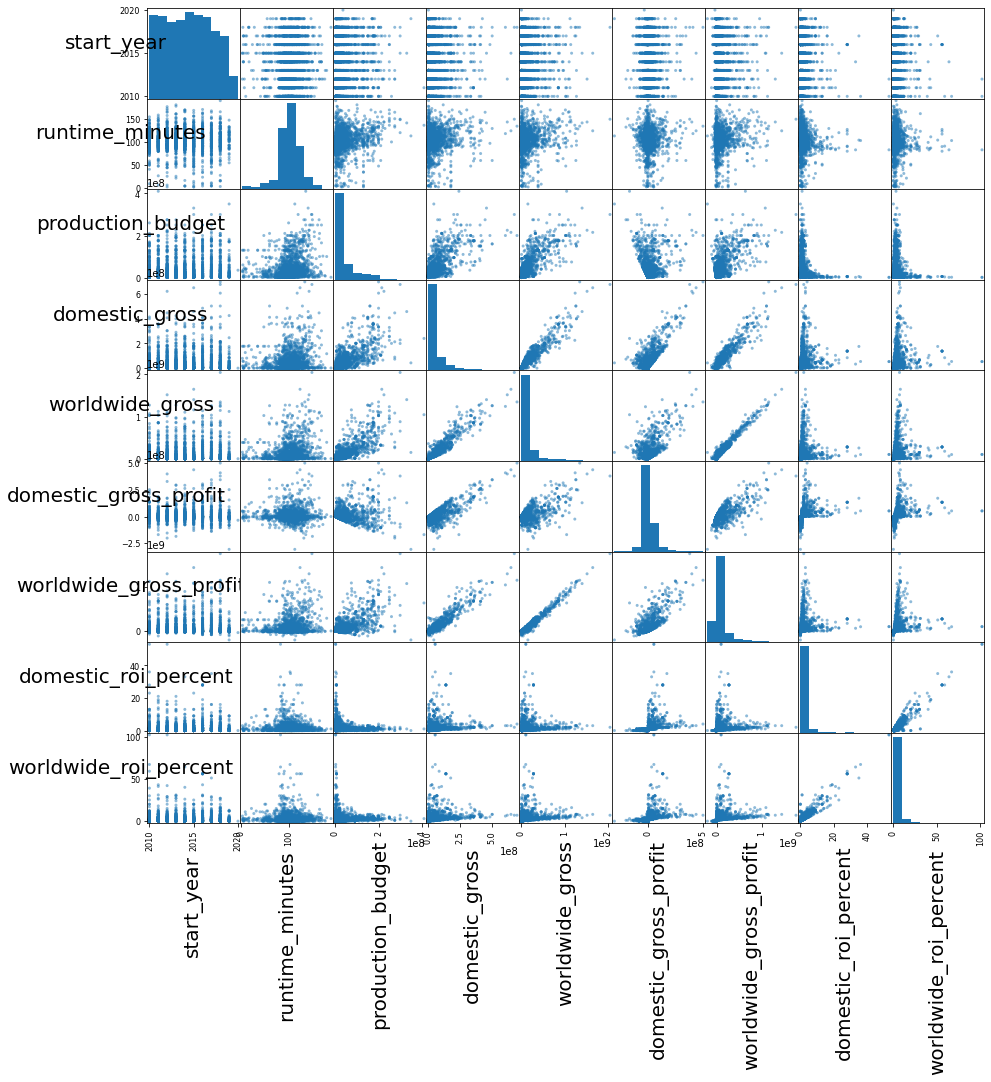

In [81]:
scatter_matrix = pd.plotting.scatter_matrix(
    df4,
    figsize  = [15, 15]#,
#     marker   = ".",
#     s        = 0.2,
#     diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0)

To drill down further on the relationship between Runtime Minutes and Domestic ROI Percent. The minutes were grouped by year and rounded to the 0 places since typically movies are only described in whole minutes

In [82]:
df6 = df4.tail(150)
df6 = df6.groupby(['start_year']).mean()
df6['runtime_minutes']=round(df6['runtime_minutes'],0)
df6


,runtime_minutes,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent
start_year,,,,,,,,
2010,94.0,4.888203e+06,5.034187e+07,9.461879e+07,4.545366e+07,8.973059e+07,14.333333,26.722222
2011,97.0,4.773761e+06,3.608828e+07,7.179414e+07,3.131452e+07,6.702038e+07,10.928571,20.142857
2012,94.0,1.066429e+07,7.778303e+07,1.575851e+08,6.711874e+07,1.469208e+08,12.928571,25.428571
2013,83.0,1.077857e+07,7.183005e+07,1.770090e+08,6.105148e+07,1.662304e+08,9.857143,20.071429
2014,102.0,8.207510e+06,5.458619e+07,1.356763e+08,4.637868e+07,1.274688e+08,7.666667,20.200000
2015,97.0,1.432500e+07,8.356906e+07,2.085943e+08,6.924406e+07,1.942693e+08,7.071429,15.714286
2016,94.0,1.539783e+07,1.173078e+08,2.777675e+08,1.019099e+08,2.623697e+08,13.782609,28.478261
2017,101.0,2.000667e+07,1.234879e+08,2.942634e+08,1.034813e+08,2.742567e+08,10.400000,19.000000
2018,103.0,1.066944e+07,7.549884e+07,1.723262e+08,6.482940e+07,1.616568e+08,8.055556,16.111111


The above table shows that movie times for the top 150 movies range from 99 minutes to 105 minutes.  Meaning that all the 150 movies are withing 6 minutes of the others.  Seems like a small range for such a diverse group of elements. Below er look to see if this trend is reflective of all the movies in our data set.

In [83]:
df5 = df4.groupby(['start_year']).mean()
df5['runtime_minutes']=round(df5['runtime_minutes'],0)

df5


,runtime_minutes,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent
start_year,,,,,,,,
2010,102.0,3.575972e+07,4.447180e+07,1.038875e+08,8.712087e+06,6.812783e+07,1.984375,3.871094
2011,102.0,3.833374e+07,4.471338e+07,1.111158e+08,6.379640e+06,7.278201e+07,1.661417,3.342520
2012,101.0,4.110708e+07,4.991368e+07,1.233575e+08,8.806601e+06,8.225039e+07,1.796610,3.669492
2013,104.0,4.076439e+07,4.711385e+07,1.151156e+08,6.349458e+06,7.435123e+07,1.562500,3.312500
2014,103.0,3.783038e+07,4.894848e+07,1.221308e+08,1.111810e+07,8.430037e+07,1.400000,3.135849
2015,100.0,3.377672e+07,4.161903e+07,1.013513e+08,7.842309e+06,6.757454e+07,1.408560,3.007782
2016,103.0,4.042475e+07,5.418752e+07,1.306297e+08,1.376277e+07,9.020499e+07,2.313253,4.690763
2017,99.0,4.956400e+07,5.771735e+07,1.523517e+08,8.153353e+06,1.027877e+08,1.854369,3.665049
2018,105.0,4.550791e+07,6.632132e+07,1.633607e+08,2.081341e+07,1.178528e+08,1.958115,3.884817


When we look at the avrages for all the data from the past 10 years we see an even smaller range
of 6 minutes. Futher below you will see graphes that dive deeper in to these findings.


Below begins to look at the correlation between the Domestic ROI Percent and Worldwide ROI
Percent. Since looking at the at the top 150 based on Domestic ROI Percent and comparing it to
all the above was useful the following tables will continue that type of comparison.


In [84]:
#Round percent 3 decimal points
df6 = df4.tail(150).groupby(['start_year']).mean()
df6['domestic_roi_percent']=round(df6['domestic_roi_percent'],3)
df6['worldwide_roi_percent']=round(df6['worldwide_roi_percent'],3)
df6


,runtime_minutes,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent
start_year,,,,,,,,
2010,93.928571,4.888203e+06,5.034187e+07,9.461879e+07,4.545366e+07,8.973059e+07,14.333,26.722
2011,96.923077,4.773761e+06,3.608828e+07,7.179414e+07,3.131452e+07,6.702038e+07,10.929,20.143
2012,93.750000,1.066429e+07,7.778303e+07,1.575851e+08,6.711874e+07,1.469208e+08,12.929,25.429
2013,82.833333,1.077857e+07,7.183005e+07,1.770090e+08,6.105148e+07,1.662304e+08,9.857,20.071
2014,102.357143,8.207510e+06,5.458619e+07,1.356763e+08,4.637868e+07,1.274688e+08,7.667,20.200
2015,96.923077,1.432500e+07,8.356906e+07,2.085943e+08,6.924406e+07,1.942693e+08,7.071,15.714
2016,94.136364,1.539783e+07,1.173078e+08,2.777675e+08,1.019099e+08,2.623697e+08,13.783,28.478
2017,100.846154,2.000667e+07,1.234879e+08,2.942634e+08,1.034813e+08,2.742567e+08,10.400,19.000
2018,102.875000,1.066944e+07,7.549884e+07,1.723262e+08,6.482940e+07,1.616568e+08,8.056,16.111


In [85]:
#Round percent 3 decimal points
df5 = df4.groupby(['start_year']).mean()
df5['domestic_roi_percent']=round(df5['domestic_roi_percent'],3)
df5['worldwide_roi_percent']=round(df5['worldwide_roi_percent'],3)
df5


,runtime_minutes,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent
start_year,,,,,,,,
2010,101.528926,3.575972e+07,4.447180e+07,1.038875e+08,8.712087e+06,6.812783e+07,1.984,3.871
2011,101.950617,3.833374e+07,4.471338e+07,1.111158e+08,6.379640e+06,7.278201e+07,1.661,3.343
2012,101.479452,4.110708e+07,4.991368e+07,1.233575e+08,8.806601e+06,8.225039e+07,1.797,3.669
2013,104.379913,4.076439e+07,4.711385e+07,1.151156e+08,6.349458e+06,7.435123e+07,1.562,3.312
2014,102.791165,3.783038e+07,4.894848e+07,1.221308e+08,1.111810e+07,8.430037e+07,1.400,3.136
2015,100.165323,3.377672e+07,4.161903e+07,1.013513e+08,7.842309e+06,6.757454e+07,1.409,3.008
2016,103.296137,4.042475e+07,5.418752e+07,1.306297e+08,1.376277e+07,9.020499e+07,2.313,4.691
2017,99.243094,4.956400e+07,5.771735e+07,1.523517e+08,8.153353e+06,1.027877e+08,1.854,3.665
2018,104.530488,4.550791e+07,6.632132e+07,1.633607e+08,2.081341e+07,1.178528e+08,1.958,3.885


In [86]:
df5['year']= ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
df5

,runtime_minutes,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent,year
start_year,,,,,,,,,
2010,101.528926,3.575972e+07,4.447180e+07,1.038875e+08,8.712087e+06,6.812783e+07,1.984,3.871,2010
2011,101.950617,3.833374e+07,4.471338e+07,1.111158e+08,6.379640e+06,7.278201e+07,1.661,3.343,2011
2012,101.479452,4.110708e+07,4.991368e+07,1.233575e+08,8.806601e+06,8.225039e+07,1.797,3.669,2012
2013,104.379913,4.076439e+07,4.711385e+07,1.151156e+08,6.349458e+06,7.435123e+07,1.562,3.312,2013
2014,102.791165,3.783038e+07,4.894848e+07,1.221308e+08,1.111810e+07,8.430037e+07,1.400,3.136,2014
2015,100.165323,3.377672e+07,4.161903e+07,1.013513e+08,7.842309e+06,6.757454e+07,1.409,3.008,2015
2016,103.296137,4.042475e+07,5.418752e+07,1.306297e+08,1.376277e+07,9.020499e+07,2.313,4.691,2016
2017,99.243094,4.956400e+07,5.771735e+07,1.523517e+08,8.153353e+06,1.027877e+08,1.854,3.665,2017
2018,104.530488,4.550791e+07,6.632132e+07,1.633607e+08,2.081341e+07,1.178528e+08,1.958,3.885,2018


In [87]:
df6['year']= ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
df6

,runtime_minutes,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent,year
start_year,,,,,,,,,
2010,93.928571,4.888203e+06,5.034187e+07,9.461879e+07,4.545366e+07,8.973059e+07,14.333,26.722,2010
2011,96.923077,4.773761e+06,3.608828e+07,7.179414e+07,3.131452e+07,6.702038e+07,10.929,20.143,2011
2012,93.750000,1.066429e+07,7.778303e+07,1.575851e+08,6.711874e+07,1.469208e+08,12.929,25.429,2012
2013,82.833333,1.077857e+07,7.183005e+07,1.770090e+08,6.105148e+07,1.662304e+08,9.857,20.071,2013
2014,102.357143,8.207510e+06,5.458619e+07,1.356763e+08,4.637868e+07,1.274688e+08,7.667,20.200,2014
2015,96.923077,1.432500e+07,8.356906e+07,2.085943e+08,6.924406e+07,1.942693e+08,7.071,15.714,2015
2016,94.136364,1.539783e+07,1.173078e+08,2.777675e+08,1.019099e+08,2.623697e+08,13.783,28.478,2016
2017,100.846154,2.000667e+07,1.234879e+08,2.942634e+08,1.034813e+08,2.742567e+08,10.400,19.000,2017
2018,102.875000,1.066944e+07,7.549884e+07,1.723262e+08,6.482940e+07,1.616568e+08,8.056,16.111,2018


Text(0, 0.5, 'ROI (percent)')

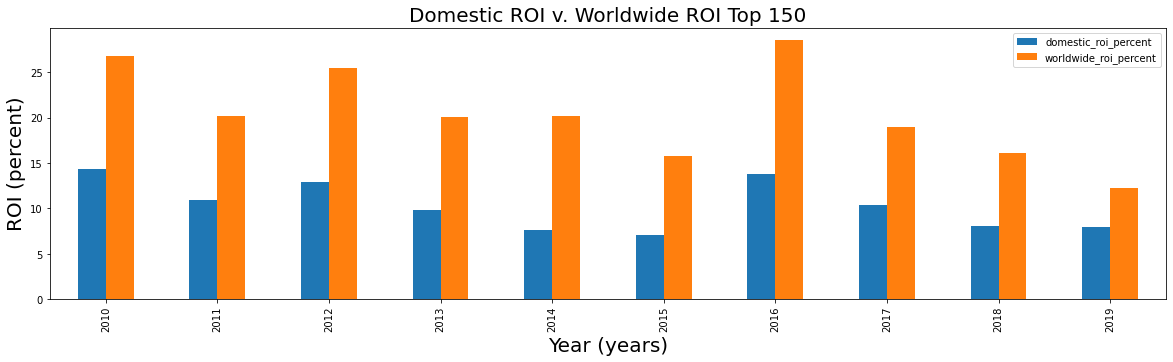

In [88]:
df6.reset_index().plot(
    x="year", y= ["domestic_roi_percent", "worldwide_roi_percent"], kind="bar", figsize  = [20, 5], 
)
plt.title("Domestic ROI v. Worldwide ROI Top 150",  fontsize = 20)
plt.xlabel("Year (years)", fontsize = 20)
plt.ylabel("ROI (percent)", fontsize = 20,)

Above you can see that for the top 150 movies, for their respective year, had almost a 1:2 ratio for
Domestic ROI Percent to Worldwide ROI Percent. letting up know that if a movie is doing well
domestically it would do just as well worldwide. Increasing profits with a lot less effort that doing a
whole another movie.


Below you can see that that that trend is also represented with in all the data. Which shows that
even if you do put out a poor performing movie you should still be able to double you ROI by
making it available worldwide.


Text(0, 0.5, 'ROI (percent)')

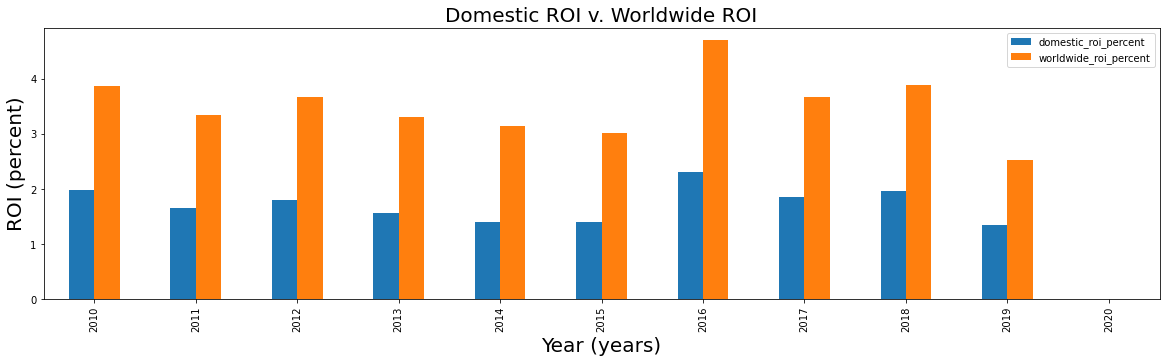

In [89]:
#df5[[df5['year'], "domestic_roi_percent", "worldwide_roi_percent"]].plot(x=df5['year'], kind="bar")
df5.reset_index().plot(
    x="year", y= ["domestic_roi_percent", "worldwide_roi_percent"], kind="bar", figsize  = [20, 5]
)
plt.title("Domestic ROI v. Worldwide ROI",  fontsize = 20)
plt.xlabel("Year (years)", fontsize = 20)
plt.ylabel("ROI (percent)", fontsize = 20)

## How long should the movies be? 

In [90]:
x = df5['runtime_minutes'].mean()
print('The average movie time is ' + 'x')

The average movie time is x


In [91]:
df5

,runtime_minutes,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent,year
start_year,,,,,,,,,
2010,101.528926,3.575972e+07,4.447180e+07,1.038875e+08,8.712087e+06,6.812783e+07,1.984,3.871,2010
2011,101.950617,3.833374e+07,4.471338e+07,1.111158e+08,6.379640e+06,7.278201e+07,1.661,3.343,2011
2012,101.479452,4.110708e+07,4.991368e+07,1.233575e+08,8.806601e+06,8.225039e+07,1.797,3.669,2012
2013,104.379913,4.076439e+07,4.711385e+07,1.151156e+08,6.349458e+06,7.435123e+07,1.562,3.312,2013
2014,102.791165,3.783038e+07,4.894848e+07,1.221308e+08,1.111810e+07,8.430037e+07,1.400,3.136,2014
2015,100.165323,3.377672e+07,4.161903e+07,1.013513e+08,7.842309e+06,6.757454e+07,1.409,3.008,2015
2016,103.296137,4.042475e+07,5.418752e+07,1.306297e+08,1.376277e+07,9.020499e+07,2.313,4.691,2016
2017,99.243094,4.956400e+07,5.771735e+07,1.523517e+08,8.153353e+06,1.027877e+08,1.854,3.665,2017
2018,104.530488,4.550791e+07,6.632132e+07,1.633607e+08,2.081341e+07,1.178528e+08,1.958,3.885,2018


The two graph below show an intresting runtime to Domestic ROI Percent trend. With a Avrage of
102 it is clear that movie maker have a "rule" about lenght of movies, that it should be as close to
102 minutes as possible.

(0.0, 150.0)

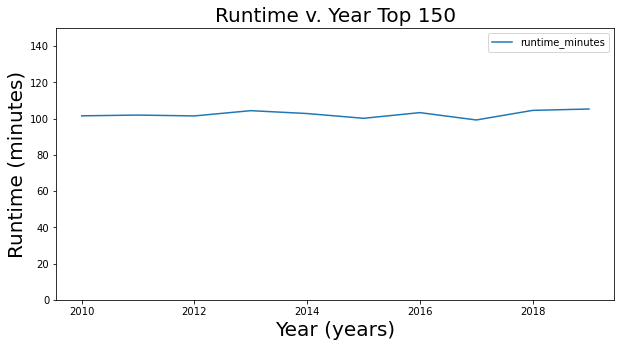

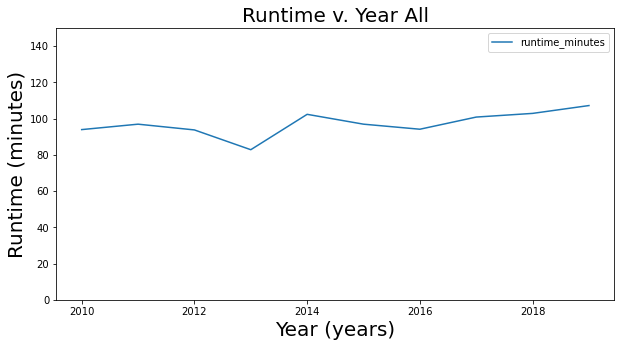

In [92]:
ax1 = df5.plot.line(x='year',
                      y='runtime_minutes', figsize  = [10, 5])
plt.title("Runtime v. Year Top 150",  fontsize = 20)
plt.xlabel("Year (years)", fontsize = 20)
plt.ylabel("Runtime (minutes)", fontsize = 20)
plt.ylim([0, 150])

ax2 = df6.plot.line(x='year',
                      y='runtime_minutes', figsize  = [10, 5])
plt.title("Runtime v. Year All",  fontsize = 20)
plt.xlabel("Year (years)", fontsize = 20)
plt.ylabel("Runtime (minutes)", fontsize = 20)

plt.ylim([0, 150])

The Below scatter plot reinforces the "rule" around time. The movies that stayed around the 102
had ROI that ranged from 0 to above 50. whereas the further you got away from 102 minutes the
lower the ROI was. It is safest to stick to a time of 102 and hope for a hit than to think you are the
expectation to the rule because even when looking at all the data there were no excessively long
or short movies that had a return grater that 10%.


In [93]:
df44 = df4.tail(150)

Text(0, 0.5, 'Runtime (minutes)')

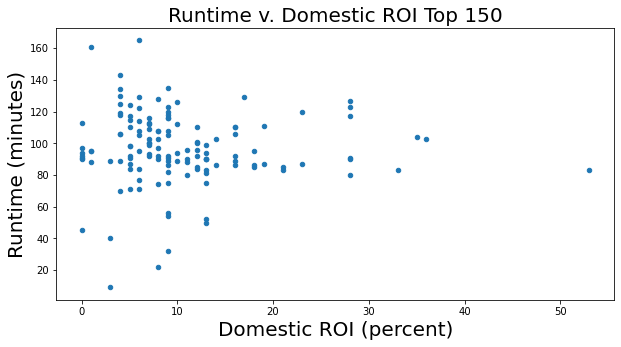

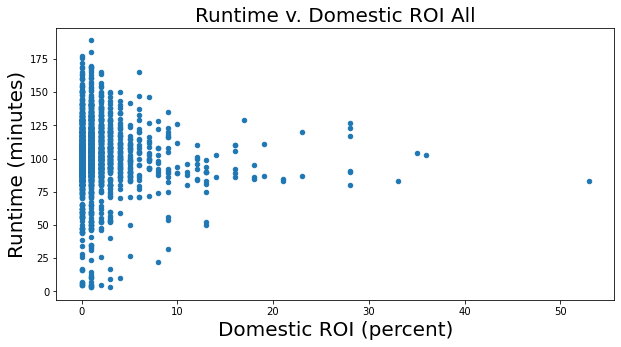

In [94]:
ax3 = df44.plot.scatter(x='domestic_roi_percent',
                      y='runtime_minutes', figsize  = [10, 5])
plt.title("Runtime v. Domestic ROI Top 150",  fontsize = 20)
plt.xlabel("Domestic ROI (percent)", fontsize = 20)
plt.ylabel("Runtime (minutes)", fontsize = 20)

ax3 = df4.plot.scatter(x='domestic_roi_percent',
                      y='runtime_minutes', figsize  = [10, 5])
plt.title("Runtime v. Domestic ROI All",  fontsize = 20)
plt.xlabel("Domestic ROI (percent)", fontsize = 20)
plt.ylabel("Runtime (minutes)", fontsize = 20)

In [95]:
df4['runtime_minutes'].mean()

102.21029626032055

In [96]:
x=0
y=0
for i in list(df4['runtime_minutes'] < 102):
    if i == True:
        x=x+1
    else:
        y=y+1
        
print(x,y)

995 1229


# Concludsion/Recommendations

## Production Budget should be \$120,283,930

Based on the expected Gross and Profit it is suggested that Microsoft plans to spend the above
amount on a new movie.(Thought this number does not include start up cost.)



## Movie Length Should be 102 Minutes
Movies whose length is above and below have a lower ROI with no outliers with in thoughs groups.


## Create a Movie That Can Easily be Translated and Marketed in Several
Countries
When looking at the data from the top 150 and all data the ROI on averages doubles when the
make for the movie was expanded world wide


# Future Work
The following will help to improve findings and find more insightful findings: Scape and use various
movie websites and compare information. 
- Sign up for a benchmark to get data directly from other studios. 
- Research changes to the movie industry since as a result of COVID(ie When will movies attendance be back to normal? How has movies going straight to digital effected the marker?) 
- Investigate weather how many non-domestic movies where not translate and see how that effect ROI. 
- Explore what makes extremely profitable movies so successful. 
- Drill down on which genres in other countries are most popular.